In [1]:
import pandas as pd

from tqdm import tqdm

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split

from news_vec.utils import read_json_gz_lines

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [4]:
df = pd.DataFrame(list(tqdm(read_json_gz_lines('../data/clf-imp-rows.json/'))))

3200it [00:00, 367186.63it/s]


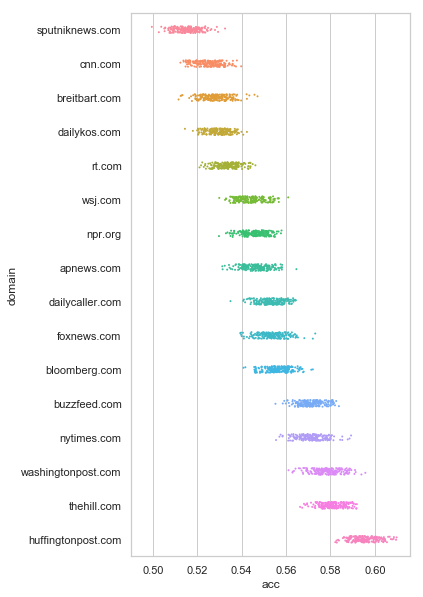

In [10]:
order = df.groupby('domain').mean().sort_values('acc').index
plt.figure(figsize=(5,10))
sns.stripplot(x='acc', y='domain', data=df, s=2, order=order)

In [ ]:
def imp_preds(domain, cv=10):
    
    pdf = df[df.domain==domain].sample(min_count).copy()
    pdf['imp_rank'] = pdf.impressions.rank(pct=True)
    pdf['imp_high'] = pdf.imp_rank > 0.5
    
    X = pdf.clf_tokens
    y = pdf.imp_high
    
    tv = TfidfVectorizer(
        analyzer='word',
        tokenizer=lambda x: x,
        preprocessor=lambda x: x,
        ngram_range=(1,3),
        token_pattern=None,
    )
    
    X = tv.fit_transform(X)
    
    clf = LinearSVC()
    return cross_val_score(clf, X, y, cv=cv)